In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
# calculating the bmi
df['bmi'] = df.weight / ((df.height / 100) **2)

In [8]:
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805


In [4]:
# calculating overweight value 
def overweight_function(x):
    if x > 25:
        return 1
    else: return 0

In [5]:
# Add 'overweight' column
df['overweight'] = df.bmi.apply(lambda x :overweight_function(x) )

In [11]:
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0


In [12]:
df.gluc.value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [13]:
df.cholesterol.value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [6]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
def norm_data(x):
    if x == 1:
        return 0
    else: return 1
df.cholesterol = df.cholesterol.apply(lambda x :norm_data(x))
df.gluc = df.gluc.apply(lambda x :norm_data(x))

In [15]:
df.gluc.value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

In [7]:
df.cholesterol.value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [13]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi', 'overweight'],
      dtype='object')

In [ ]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = None


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    # You will have to rename one of the columns for the catplot to work correctly.
    df_cat = None

    # Draw the catplot with 'sns.catplot()'



    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [32]:
subset = df[['id', 'cardio', 'cholesterol','gluc', 'smoke', 'alco', 'active', 'overweight']].melt(id_vars=['id', 'cardio'])
subset

,id,cardio,variable,value
0,0,0,cholesterol,0
1,1,1,cholesterol,1
2,2,1,cholesterol,1
3,3,1,cholesterol,0
4,4,0,cholesterol,0
...,...,...,...,...
419995,99993,0,overweight,1
419996,99995,1,overweight,1
419997,99996,1,overweight,1
419998,99998,1,overweight,1


<AxesSubplot:xlabel='gluc', ylabel='count'>

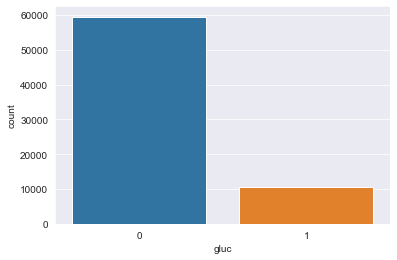

In [77]:
sns.countplot(x=df.gluc)


In [54]:
cat_order = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']



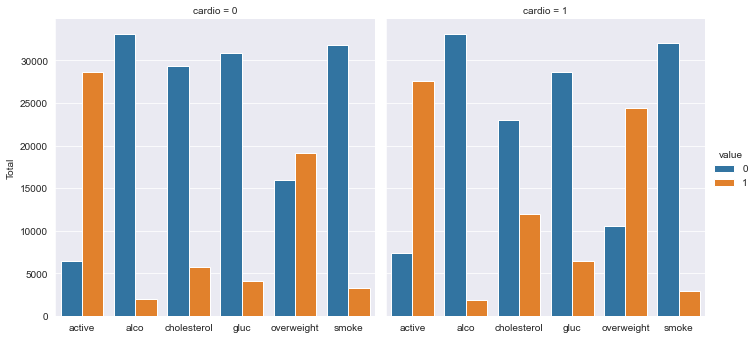

In [89]:
g = sns.catplot(x='variable',hue = 'value',
               data=subset, kind="count", col='cardio', order = cat_order, aspect = 1)
g.set_ylabels('Total')
g.set_xlabels('')

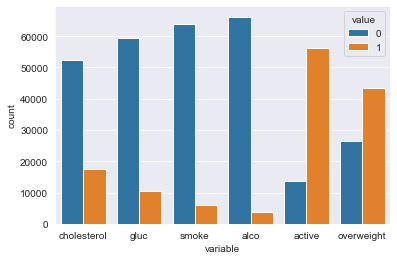

In [39]:
g= sns.countplot(x='variable',hue = 'value',
               data=subset)

E:\udacity\anac\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(447.4000000000001, 0.5, '1234')

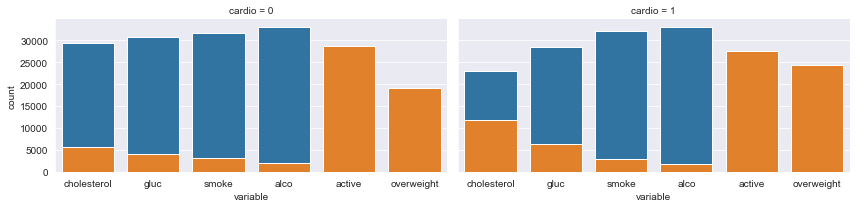

In [75]:
g= sns.FacetGrid(data=subset, col='cardio', hue = 'value', aspect = 2)
g.map(sns.countplot,'variable')
plt.ylabel('1234')